In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
with open("RandomSongsData.json", "r") as json_file:
    data = json.load(json_file)

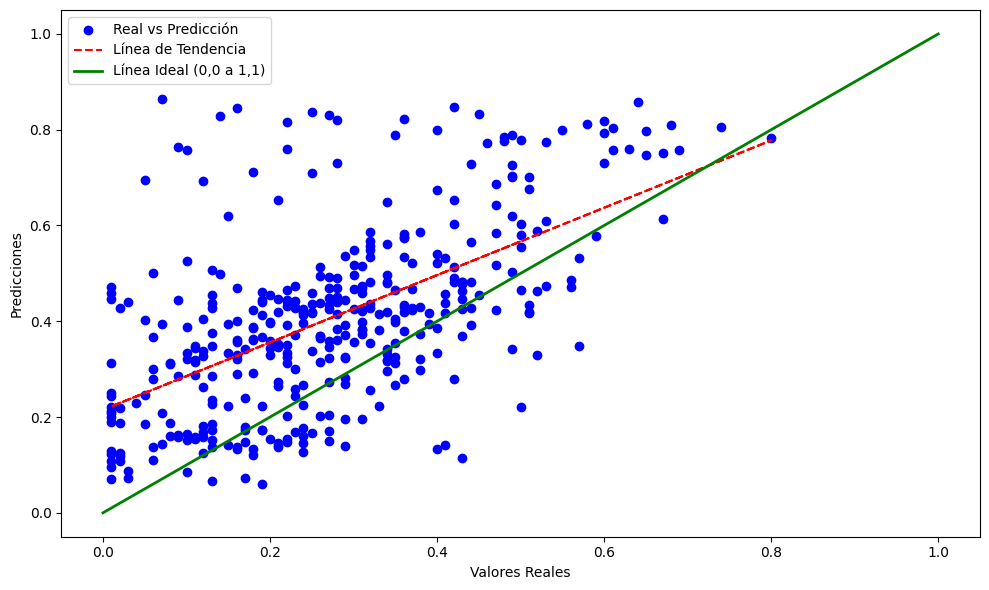

In [3]:
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

plt.scatter(df['real'], df['prediction'], label='Real vs Predicción', color='blue', marker='o')

z = np.polyfit(df['real'], df['prediction'], 1)
p = np.poly1d(z)

plt.plot(df['real'], p(df['real']), "r--", label='Línea de Tendencia')

plt.plot([0, 1], [0, 1], "g-", label='Línea Ideal (0,0 a 1,1)', linewidth=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
# plt.title('Comparación entre Valores Reales y Predicciones con Línea de Tendencia y Línea Ideal')

plt.legend()

plt.tight_layout()
plt.show()

In [4]:
mae = mean_absolute_error(df['real'], df['prediction'])
print(f"MAE: {mae}")
mse = mean_squared_error(df['real'], df['prediction'])
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(df['real'], df['prediction'])
print(f"R²: {r2}")
mape = np.mean(np.abs((df['real'] - df['prediction']) / df['real'])) * 100
print(f"MAPE: {mape}%")

MAE: 0.16282173625780857
MSE: 0.04457716049941038
RMSE: 0.21113303980999842
R²: -0.7567852615945929
MAPE: 194.54723236862188%


In [5]:
sobreestimaciones = df[df['prediction'] > df['real']]
sobreestimacion_promedio = (sobreestimaciones['prediction'] - sobreestimaciones['real']).mean()
print(f"Sobreestimación Promedio: {sobreestimacion_promedio}")

Sobreestimación Promedio: 0.18417776039852737


In [6]:
# Politicas de Spotify de no almacenamiento de sus datos.
os.remove("RandomSongsData.json")